# Spearman correlation between prediction score and sampling time

This notebook shows the analysis of spearman correlation analysis between model predictions and the real sampling time

## Set up analysis

### Import python modules

In [1]:
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np

### Read in data used

Gisaid information from GISAID website https://www.gisaid.org (2022.03.08 release)

In [2]:
gisaid_info=pd.read_csv('../data/unique_GISAID.csv',index_col=0,parse_dates=True)

In [3]:
gisaid_info.head()

,n_seq,seq,seqlen,gene_id,date,timestamp,host,group,country,continent,dataset,accession
0,602966,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,201,hCoV-19/Wuhan/IPBCAMS-WH-01/2019,2019-12-24,1.577135e+09,human,human,Wuhan,Asia (Eastern),gisaid,Spike|hCoV-19/Wuhan/IPBCAMS-WH-01/2019|2019-12...
1,45917,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,201,hCoV-19/Nigeria/CV714/2020,2020-01-01,1.577826e+09,human,human,Nigeria,Africa (Western),gisaid,Spike|hCoV-19/Nigeria/CV714/2020|2020-00-00|EP...
2,55547,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,201,hCoV-19/France/PAC-IHU-37302-Nova1M/2020,2020-01-01,1.577826e+09,human,human,France,Europe,gisaid,Spike|hCoV-19/France/PAC-IHU-37302-Nova1M/2020...
3,26230,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,201,hCoV-19/England/NORT-1B7E6B2/2020,2020-01-01,1.577826e+09,human,human,England,Europe,gisaid,Spike|hCoV-19/England/NORT-1B7E6B2/2020|2020-0...
4,895810,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,201,hCoV-19/England/PORT-2E44AA/2020,2020-01-01,1.577826e+09,human,human,England,Europe,gisaid,Spike|hCoV-19/England/PORT-2E44AA/2020|2020-00...


Model prediction results for gisaid released samples

In [4]:
gisaid_score_df=pd.read_csv('../data/gisaid_score.csv',index_col=0)

In [5]:
gisaid_score_df["escape_score"]=gisaid_score_df.iloc[:,2:-1].mean(axis=1)
gisaid_score_df.head()

,seq,ACE2,COV2-2096,COV2-2832,COV2-2094,COV2-2050,COV2-2677,COV2-2479,COV2-2165,COV2-2499,mean_score,escape_score
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0.471435,0.002486,0.000032,0.000115,0.000071,0.000102,0.000081,0.000116,0.000775,0.052801,0.000472
1,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0.995086,0.994998,0.489704,0.003482,0.995438,0.031297,0.944625,0.203610,0.002961,0.517911,0.458264
2,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0.973071,0.000499,0.000056,0.000140,0.000096,0.000497,0.000137,0.000251,0.000214,0.108329,0.000236
3,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0.687624,0.000463,0.000019,0.000141,0.000200,0.000905,0.000076,0.000083,0.000032,0.076616,0.000240
4,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0.997554,0.001372,0.000285,0.000176,0.000545,0.001456,0.000778,0.001115,0.000133,0.111491,0.000733


In [6]:
gisaid_info=pd.concat([gisaid_score_df,gisaid_info],axis=1)
date_index = list(gisaid_info.columns).index('date')
gisaid_info["date"] = pd.to_datetime(gisaid_info["date"])
gisaid_info=gisaid_info.sort_values("date").set_index("date")
gisaid_info.head()

,seq,ACE2,COV2-2096,COV2-2832,COV2-2094,COV2-2050,COV2-2677,COV2-2479,COV2-2165,COV2-2499,...,seq,seqlen,gene_id,timestamp,host,group,country,continent,dataset,accession
date,,,,,,,,,,,,,,,,,,,,,
2010-12-06,NITNLCPFGEVFNATTFASVYAWNRRRISNCVADYSVLYNTTSFST...,0.003066,0.999999,0.649814,0.985170,0.998501,0.953067,0.972279,0.240445,0.999999,...,NITNLCPFGEVFNATTFASVYAWNRRRISNCVADYSVLYNTTSFST...,201,hCoV-19/bat/Cambodia/RShSTT200/2010,1.291583e+09,bat,bat,NaN,NaN,gisaid,Spike|hCoV-19/bat/Cambodia/RShSTT200/2010|2010...
2013-07-24,NITNLCPFGEVFNATTFASVYAWNRKRISNCVADYSVLYNSTSFST...,0.003949,1.000000,0.881905,0.982258,0.999790,0.901730,0.996157,0.442574,0.999985,...,NITNLCPFGEVFNATTFASVYAWNRKRISNCVADYSVLYNSTSFST...,201,hCoV-19/bat/Yunnan/RaTG13/2013,1.374613e+09,bat,bat,NaN,NaN,gisaid,Spike|hCoV-19/bat/Yunnan/RaTG13/2013|2013-07-2...
2017-01-01,NITNLCPFGEVFNASKFASVYAWNRKRISNCVADYSVLYNSTSFST...,0.002775,0.999992,0.973799,0.997651,0.999956,0.995204,0.998776,0.833033,0.999696,...,NITNLCPFGEVFNASKFASVYAWNRKRISNCVADYSVLYNSTSFST...,201,hCoV-19/pangolin/Guangxi/P5E/2017,1.483218e+09,pangolin,pangolin,NaN,NaN,gisaid,Spike|hCoV-19/pangolin/Guangxi/P5E/2017|2017-0...
2017-01-01,NITNLCPFGEVFNASKFASVYAWNRKRISNCVADYSVLYNSTSFST...,0.004105,0.999996,0.969132,0.999136,0.999966,0.998627,0.998738,0.826423,0.999868,...,NITNLCPFGEVFNASKFASVYAWNRKRISNCVADYSVLYNSTSFST...,201,hCoV-19/pangolin/Guangxi/P4L/2017,1.483218e+09,pangolin,pangolin,NaN,NaN,gisaid,Spike|hCoV-19/pangolin/Guangxi/P4L/2017|2017-0...
2017-01-01,NITNLCPFGEVFNASKFASVYAWNRKRISNCVADYSVLYNSTSFST...,0.007859,0.999998,0.984774,0.997605,0.999970,0.994916,0.999429,0.880455,0.999941,...,NITNLCPFGEVFNASKFASVYAWNRKRISNCVADYSVLYNSTSFST...,201,hCoV-19/pangolin/Guangxi/P1E/2017,1.483218e+09,pangolin,pangolin,NaN,NaN,gisaid,Spike|hCoV-19/pangolin/Guangxi/P1E/2017|2017-0...


## Spearman Correlation analysis based on time

### 3 Month interval 

In [45]:
perid=pd.date_range('2020-02-01','2022-02-01',freq="MS")

In [46]:
spcc_mean_score=[]
spcc_escape=[]
spcc_ace=[]
for edt in perid:
    df=gisaid_info.loc[edt - pd.tseries.offsets.DateOffset(months=3):edt, ['mean_score','timestamp','ACE2','escape_score']]
    spcc_mean_score.append(ss.spearmanr(df["mean_score"],df["timestamp"])[0])
    spcc_escape.append(ss.spearmanr(df["escape_score"],df["timestamp"])[0])
    spcc_ace.append(ss.spearmanr(df["ACE2"],df["timestamp"])[0])

In [47]:
spcc_df=pd.DataFrame({"overall_score":spcc_mean_score,"immnue_escape":spcc_escape,"ACE2_binding":spcc_ace},index=perid)
spcc_df.head()

,overall_score,immnue_escape,ACE2_binding
2020-02-01,-0.164497,-0.118128,-0.116609
2020-03-01,0.002781,0.198886,-0.223859
2020-04-01,-0.154946,-0.019201,-0.172753
2020-05-01,-0.058837,-0.013664,-0.082465
2020-06-01,0.009344,0.030126,-0.081807


Text(0, 0.5, 'Spearman Correlation')

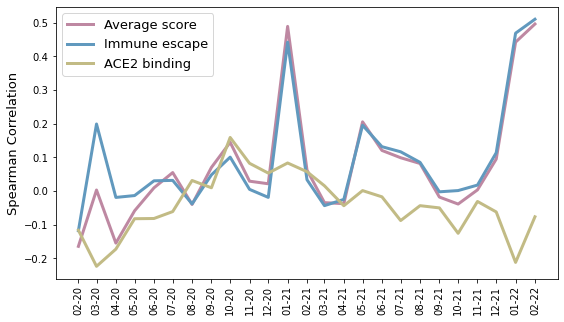

In [48]:
plt.figure(figsize=(9,5))
ax=sns.lineplot(data=spcc_df,linewidth=3,dashes=False,palette=["#be88a2","#6199be","#c2bb85"])
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1,2,3,4,5,6,7,8,9,10,11,12)))
#ax.xaxis.set_major_formatter(dates.DateFormatter("%b-%y"))
ax.xaxis.set_major_formatter(dates.DateFormatter("%m-%y"))
plt.xticks(perid)
ax.legend(labels=["Average score","Immune escape","ACE2 binding"],fontsize=13)
ax.set_ylabel(ylabel="Spearman Correlation",fontsize=13)
#plt.savefig('figures/spcc_3M.png',dpi=500)


### 6 Month interval 

In [49]:
perid=pd.date_range('2020-06-01','2022-02-01',freq="MS")

In [50]:
spcc_mean_score=[]
spcc_escape=[]
spcc_ace=[]
for edt in perid:
    df=gisaid_info.loc[edt - pd.tseries.offsets.DateOffset(months=6):edt, ['mean_score','timestamp','ACE2','escape_score']]
    spcc_mean_score.append(ss.spearmanr(df["mean_score"],df["timestamp"])[0])
    spcc_escape.append(ss.spearmanr(df["escape_score"],df["timestamp"])[0])
    spcc_ace.append(ss.spearmanr(df["ACE2"],df["timestamp"])[0])

In [51]:
spcc_df=pd.DataFrame({"overall_score":spcc_mean_score,"immnue_escape":spcc_escape,"ACE2_binding":spcc_ace},index=perid)

Text(0, 0.5, 'Spearman Correlation')

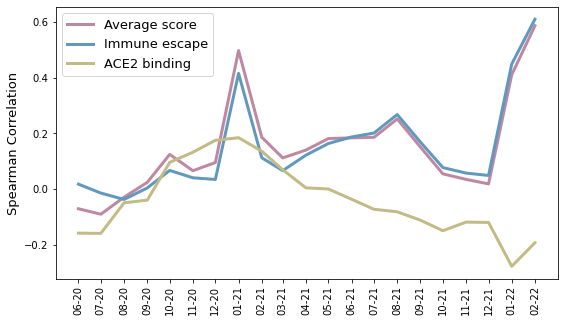

In [52]:
plt.figure(figsize=(9,5))
ax=sns.lineplot(data=spcc_df,linewidth=3,dashes=False,palette=["#be88a2","#6199be","#c2bb85"])
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1,2,3,4,5,6,7,8,9,10,11,12)))
ax.xaxis.set_major_formatter(dates.DateFormatter("%m-%y"))
plt.xticks(perid)
ax.legend(labels=["Average score","Immune escape","ACE2 binding"],fontsize=13)
ax.set_ylabel(ylabel="Spearman Correlation",fontsize=13)
#plt.savefig('figures/spcc_6M.png',dpi=500)


### 12 Month interval 

In [53]:
perid=pd.date_range('2020-12-01','2022-02-01',freq="MS")

In [54]:
spcc_mean_score=[]
spcc_escape=[]
spcc_ace=[]
for edt in perid:
    df=gisaid_info.loc[edt - pd.tseries.offsets.DateOffset(months=12):edt, ['mean_score','timestamp','ACE2','escape_score']]
    spcc_mean_score.append(ss.spearmanr(df["mean_score"],df["timestamp"])[0])
    spcc_escape.append(ss.spearmanr(df["escape_score"],df["timestamp"])[0])
    spcc_ace.append(ss.spearmanr(df["ACE2"],df["timestamp"])[0])

In [55]:
spcc_df=pd.DataFrame({"overall_score":spcc_mean_score,"immnue_escape":spcc_escape,"ACE2_binding":spcc_ace},index=perid)

Text(0, 0.5, 'Spearman Correlation')

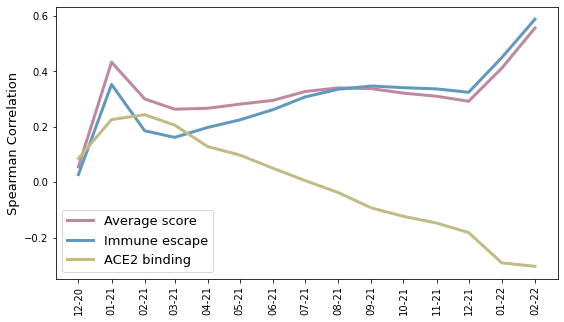

In [56]:
plt.figure(figsize=(9,5))
ax=sns.lineplot(data=spcc_df,linewidth=3,dashes=False,palette=["#be88a2","#6199be","#c2bb85"])
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1,2,3,4,5,6,7,8,9,10,11,12)))
ax.xaxis.set_major_formatter(dates.DateFormatter("%m-%y"))
plt.xticks(perid)
ax.legend(labels=["Average score","Immune escape","ACE2 binding"],fontsize=13)
ax.set_ylabel(ylabel="Spearman Correlation",fontsize=13)
#plt.savefig('figures/spcc_12M.png',dpi=500)


## Spearman correlation of all the data

In [7]:
ss.spearmanr(gisaid_info["mean_score"],gisaid_info["timestamp"])

SpearmanrResult(correlation=0.6489587198744415, pvalue=0.0)

In [8]:
ss.spearmanr(gisaid_info["escape_score"],gisaid_info["timestamp"])

SpearmanrResult(correlation=0.6696720400220084, pvalue=0.0)